# EDA Impacto del Consumo de Café
<img src="img/cafe.png" alt="Cafw" style="width: 700px; display: block; margin-left: auto; margin-right: auto;"/>

## 🎯 Contexto y Objetivo

El café ☕️, como una de las bebidas más consumidas a nivel mundial, representa un factor significativo en la rutina diaria de millones de personas. Sin embargo, su impacto en la salud 🏥, patrones de sueño 🛌 , niveles de estrés y calidad de vida ⛹🏻‍♀️ sigue siendo un tema de intenso debate científico e interés público.

Este análisis exploratorio 🚀 busca examinar las complejas relaciones entre el consumo de café y múltiples dimensiones de la salud, utilizando una base de datos integral que abarca variables demográficas, clínicas y de estilo de vida.

## 🔍 Preguntas Clave de Investigación

¿Cómo se relaciona el consumo de café con:
- La calidad y duración del sueño?
- Los niveles de estrés?
- Los hábitos de vida y la actividad física?

## 📈 Hipotesis a investigar

💥 H1: Italia y Brazil son los paises donde más café se consume.

💥 H2: Entre el consumo de cafeína y la calidad del sueño existe una correlación negativa.

💥 H3: Hay diferencias significativas en el consumo del café, nivel del estrés y calidad del sueño por genero.

💥 H4. Los adultos (18-55) toman más café y duermen menos horas que los mayores(56-80).

💥 H5: Las horas fisicamente activas se correlacionan positivamente con la calidad del sueño, pero negativamente con el IMC y el nivel del estres.

💥 H6: Los estudiantes y el personal medico son los que menos duermen y mas café consumen.

💥 H7: Las personan que fuman y toman alcool consumen más café.



Este EDA pretende servir como base para entender los efectos multidimensionales del consumo de café y guiar investigaciones más específicas en el futuro.

In [7]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 🛠️ Procesamiento y limpieza de datos

-Fuente: Kaggle

-link: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset

### Resumen:
El dataset contiene 10 000 registros que reflejan patrones reales de consumo de café, hábitos de sueño y resultados de salud en 20 países. Incluye datos demográficos, consumo diario de café, niveles de cafeína, duración y calidad del sueño, IMC, frecuencia cardíaca, estrés, actividad física, problemas de salud, ocupación, tabaquismo y consumo de alcohol.

Este conjunto de datos captura correlaciones realistas observadas en investigaciones, como el impacto de la cafeína en el sueño, el estrés y la salud, lo que lo hace ideal para análisis estadísticos, modelos predictivos y estudios sobre estilo de vida y bienestar.

### Descripción de los datos:
* **ID**: identificador único de cada persona.
* **Age**: la edad de cada persona.
* **Gender**: el genero de las personas (Male, Female, Other).
* **Country**: pais de residencia.
* **Coffee_Intake**: las tazas de cafe consumidas en un dia (0-10).
* **Caffeine_mg**: los miligramos de cafeina consumidos al dia (1 taza ≈ 95 mg).
* **Sleep_Hours**: media de las horas de sueño por noche (3-10 horas).
* **Sleep_Quality**: Poor, Fair, Good, Excellent (basados en las horas del sueño).
* **BMI**: el índice de la masa corporal (15-40).
* **Heart_Rate**: frecuencia cardiaca en reposo.
* **Stress_Level**: Low, Medium, High (basados en las horas del sueño y el estilo de vida).
* **Physical_Activity_Hours**: las horas con actividad física por semana (0-15h).
* **Health_Issues**: None, Mild, Moderate, Severe (basados en la edad, IMC y sueño).
* **Ocupation**: Office, Healthcare, Student, Service, Other
* **Smoking**: tabaquismo (0 = No, 1 = Si)
* **Alcohol_Consumption**: el consumo del alcohol (0 = No, 1 = Si)

In [8]:
df = pd.read_csv('data/coffee_consumption.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [10]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [11]:
#comprobar si hay datos nulos
print('Valores nulos en el Dataset:\n', df.isnull().sum())

Valores nulos en el Dataset:
 ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64


Como se puede ver no hay datos nulos aparte de la columna 'Healt_Issues'.

In [12]:
#comprobando si hay datos duplicados
print('Valores duplicados en el Dataset', df.duplicated().sum())

Valores duplicados en el Dataset 0


No hay datos duplicados en el Dataset

## Limpieza del Dataset
Ahora que sabemos que no hay valores nulos ni valores duplicados, podemos quitar las columnas que no vamos a usar para un mejor aspecto y pare que sea mejor visible la información necesaria.

Las columnas Health_Issues y Heart_Rate las vamos a borrar de nuestro Dataset porque no se van a usar en este analisis de datos.

In [13]:
#Elimino las columnas 'Health_Issues'y 'Heart_Rate'
df = df.drop(['Health_Issues', 'Heart_Rate'], axis = 1)
#Compruebo como queda ahora mi Dataframe
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,Low,14.5,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,Low,11.0,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,Medium,11.2,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,Low,6.6,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,Medium,8.5,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,Medium,10.1,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,Medium,11.6,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,Low,13.7,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,Low,0.1,Student,0,0


In [14]:
#añado una columna (Sleep_Quality_num) al Dataset para representar la calidad del sueño con valores numericos
mapeo_sleep = {
    'Poor': 1,
    'Fair': 2, 
    'Good': 3,
    'Excellent': 4
}
# uso un try/except para comprobar si ya existe esta columna y no crearla dos veces
try:
    _ = df['Sleep_Quality_num']
    print("Columna 'Sleep_Quality_num' ya existe!")
except KeyError:
    print("✅ Columna 'Sleep_Quality_num' creada exitosamente!")
    df.insert(8, 'Sleep_Quality_num', df['Sleep_Quality'].map(mapeo_sleep))

# Verifico como se ve en la tabla la nueva columna
df[['Sleep_Quality', 'Sleep_Quality_num']].head()

✅ Columna 'Sleep_Quality_num' creada exitosamente!


,Sleep_Quality,Sleep_Quality_num
0,Good,3
1,Good,3
2,Fair,2
3,Good,3
4,Fair,2


In [15]:
# Añado una nueva columna (Stress_Level_num) al Dataset para transformar los valores de tipo objeto del nivel de estres (Low, Medium, High) a valores numericos 
mapeo_stress = {
    'Low': 1,
    'Medium': 2, 
    'High': 3
}

# uso un try/except para comprobar si ya existe esta columna y no crearla dos veces
try:
    _ = df['Stress_Level_num']
    print("Columna 'Stress_Level_num' ya existe!")
except KeyError:
    print("✅ Columna 'Stress_Level_num' creada exitosamente!")
    df.insert(12, 'Stress_Level_num', df['Stress_Level'].map(mapeo_stress))
# Verifico como se ve en la tabla la nueva columna
df[['Stress_Level', 'Stress_Level_num']].head()

✅ Columna 'Stress_Level_num' creada exitosamente!


,Stress_Level,Stress_Level_num
0,Low,1
1,Low,1
2,Medium,2
3,Low,1
4,Medium,2


In [16]:
# Añado otra columna de clasificación para agrupar las personas en grupos de edad: Jovenes, Adultos y Mayores
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 35 ,55, 80], labels=['Joven','Adulto', 'Mayor'])

In [17]:
df[['ID', 'Age', 'Age_Group']].head(10)

,ID,Age,Age_Group
0,1,40,Adulto
1,2,33,Joven
2,3,42,Adulto
3,4,53,Adulto
4,5,32,Joven
5,6,32,Joven
6,7,53,Adulto
7,8,44,Adulto
8,9,29,Joven
9,10,41,Adulto


In [18]:
# Definir los rangos de IMC y sus categorías
bins = [0, 18.5, 25, 30, 100]  # Límites de IMC
labels = ['Bajo peso', 'Peso saludable', 'Sobrepeso', 'Obesidad']  # Categorías

# Crear la nueva columna
try:
    df['Categoria_BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)
    print('La columna Categoria_BMI creada exitosamente')
except:
    print('La columna ategoria_BMI ya existe')

La columna Categoria_BMI creada exitosamente


In [19]:
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Sleep_Quality_num,BMI,Stress_Level,Physical_Activity_Hours,Stress_Level_num,Occupation,Smoking,Alcohol_Consumption,Age_Group,Categoria_BMI
0,1,40,Male,Germany,3.5,328.1,7.5,Good,3,24.9,Low,14.5,1,Other,0,0,Adulto,Peso saludable
1,2,33,Male,Germany,1.0,94.1,6.2,Good,3,20.0,Low,11.0,1,Service,0,0,Joven,Peso saludable
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,2,22.7,Medium,11.2,2,Office,0,0,Adulto,Peso saludable
3,4,53,Male,Germany,2.6,249.2,7.3,Good,3,24.7,Low,6.6,1,Other,0,0,Adulto,Peso saludable
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,2,24.1,Medium,8.5,2,Student,0,1,Joven,Peso saludable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,2,30.5,Medium,10.1,2,Healthcare,0,1,Adulto,Obesidad
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,2,19.1,Medium,11.6,2,Service,0,0,Joven,Peso saludable
9997,9998,26,Male,China,1.6,153.4,7.1,Good,3,25.1,Low,13.7,1,Student,1,1,Joven,Sobrepeso
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,3,19.3,Low,0.1,1,Student,0,0,Adulto,Peso saludable


## Conclusiones para el Dataset:

El Dataset elegido es bastante complejo, con bastantes datos para hacer un analisis complejo. La única columna con más de la mitad valores nulos la he eliminado, ya que no altera el análisis del Dataset. Ademas, he creado dos columnas nuevas para representar con valores numericos de 1 a 3 los niveles del estres, siendo 1 el nivel más bajo, Low, 2 - Medium, y 3 - High, y con los valores de 1 a 4 para los calificativos de la calidad del sueño, siendo 1 el peor sueño (Poor), 2 - justo (Fair), 3 - bueno (Good) y 4 para un sueño excelente (Excellent).

Una vez limpio y complejo el Dataset, es hora de guardarlo como un CSV diferenciado del original. 

In [20]:
df.to_csv('data/cleaned_coffee_consumption.csv', index = False)

In [21]:
df


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,Sleep_Quality_num,BMI,Stress_Level,Physical_Activity_Hours,Stress_Level_num,Occupation,Smoking,Alcohol_Consumption,Age_Group,Categoria_BMI
0,1,40,Male,Germany,3.5,328.1,7.5,Good,3,24.9,Low,14.5,1,Other,0,0,Adulto,Peso saludable
1,2,33,Male,Germany,1.0,94.1,6.2,Good,3,20.0,Low,11.0,1,Service,0,0,Joven,Peso saludable
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,2,22.7,Medium,11.2,2,Office,0,0,Adulto,Peso saludable
3,4,53,Male,Germany,2.6,249.2,7.3,Good,3,24.7,Low,6.6,1,Other,0,0,Adulto,Peso saludable
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,2,24.1,Medium,8.5,2,Student,0,1,Joven,Peso saludable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,2,30.5,Medium,10.1,2,Healthcare,0,1,Adulto,Obesidad
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,2,19.1,Medium,11.6,2,Service,0,0,Joven,Peso saludable
9997,9998,26,Male,China,1.6,153.4,7.1,Good,3,25.1,Low,13.7,1,Student,1,1,Joven,Sobrepeso
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,3,19.3,Low,0.1,1,Student,0,0,Adulto,Peso saludable


In [22]:
#Definimos una lista de colores que vamos a usar en este análisis
colores_cafe = [ '#1A0F08', '#25150C', '#301B10', '#3B2114', '#462718',
    '#512D1C', '#5C3320', '#673924', '#723F28', '#7D452C',
    '#884B30', '#935134', '#9E5738', '#A95D3C', '#B46340',
    '#BF6944', '#CA6F48', '#D5754C', '#E07B50', '#EB8154'
]

In [23]:
# Antes del todo vamos a ver cuantas personas consumen cafe y cuantas no con un grafico de tarta

no_cons = df[df['Coffee_Intake']== 0]['ID'].count()
si_cons = df['ID'].count()


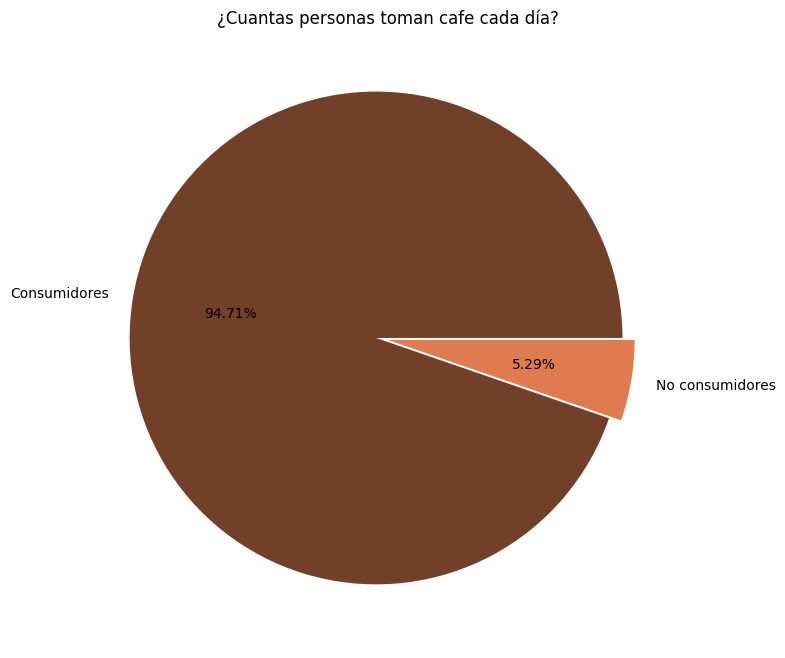

In [24]:
# Gráfico de tarta para mostrar el porcentaje de las personan que no consuman cafe y de los que consuman

plt.figure(figsize=(8,8))
explode = (0.05, 0)
plt.pie([si_cons, no_cons],
        labels=['Consumidores', 'No consumidores'],
        autopct='%1.2f%%',
        colors = [colores_cafe[8], colores_cafe[18],],
        explode=explode,)
p=plt.gcf()
plt.title('¿Cuantas personas toman cafe cada día?')
plt.show()

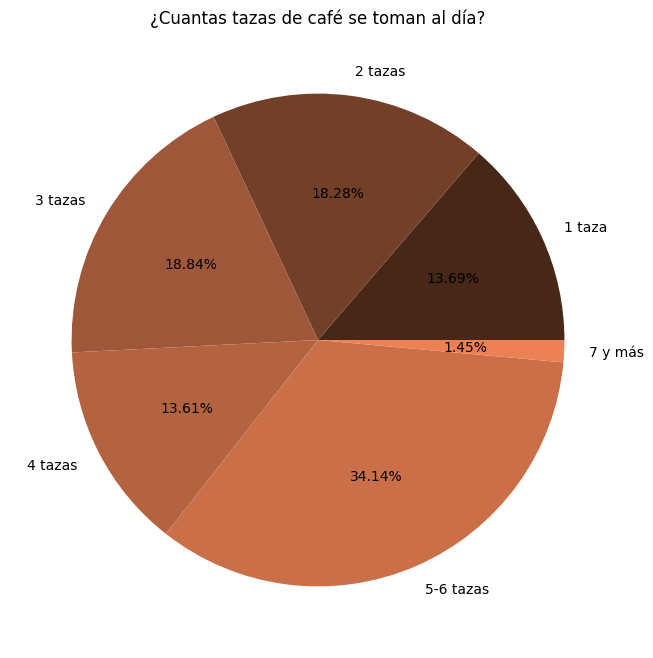

In [25]:
# Gráfico de tipo tarta para mostrar el porcentaje de las personan que se toman 1, 2, 3, 4, entre 5 y 6 y 7 o más tazas de cafe al dia
tazas_dicc = {
        '1 taza': df[df['Coffee_Intake'] == 1]['ID'].count(),
        '2 tazas': df[df['Coffee_Intake'] == 2]['ID'].count(),
        '3 tazas': df[df['Coffee_Intake']==3]['ID'].count(),
        '4 tazas': df[df['Coffee_Intake']==4]['ID'].count(),
        '5-6 tazas': df[df['Coffee_Intake'].between(5, 6)]['ID'].count(),
        '7 y más': df[df['Coffee_Intake'] >= 7]['ID'].count()
}
plt.figure(figsize=(8,8))
plt.pie(tazas_dicc.values(),
        labels=tazas_dicc.keys(),
        autopct='%1.2f%%',
        colors = [colores_cafe[4], colores_cafe[8], colores_cafe[12], colores_cafe[14], colores_cafe[16], colores_cafe[19]])
p=plt.gcf()
plt.title('¿Cuantas tazas de café se toman al día?')
plt.show()

##  HÍPOTESIS 1
### H1: Italia y Brazil son los paises donde más café se consume.

In [26]:
# sacando la media de los miligramos de café por cada taza (95mg)
print(df['Caffeine_mg'].sum() / df['Coffee_Intake'].sum())

95.01361373807902


In [27]:
# crea un dataframe para la primera hipotesis con los mg de café que se consumen de promedia en cada pais, ordenados descendentemente
df_h1=df.groupby('Country', as_index=False).mean('Caffeine_mg').round(2)[['Country','Caffeine_mg']].sort_values(by='Caffeine_mg', ascending=False)
df_h1

,Country,Caffeine_mg
15,Spain,247.00
13,Norway,246.03
18,UK,245.17
4,China,244.73
19,USA,243.47
2,Brazil,242.08
0,Australia,241.93
17,Switzerland,241.34
10,Japan,240.60
6,France,240.09


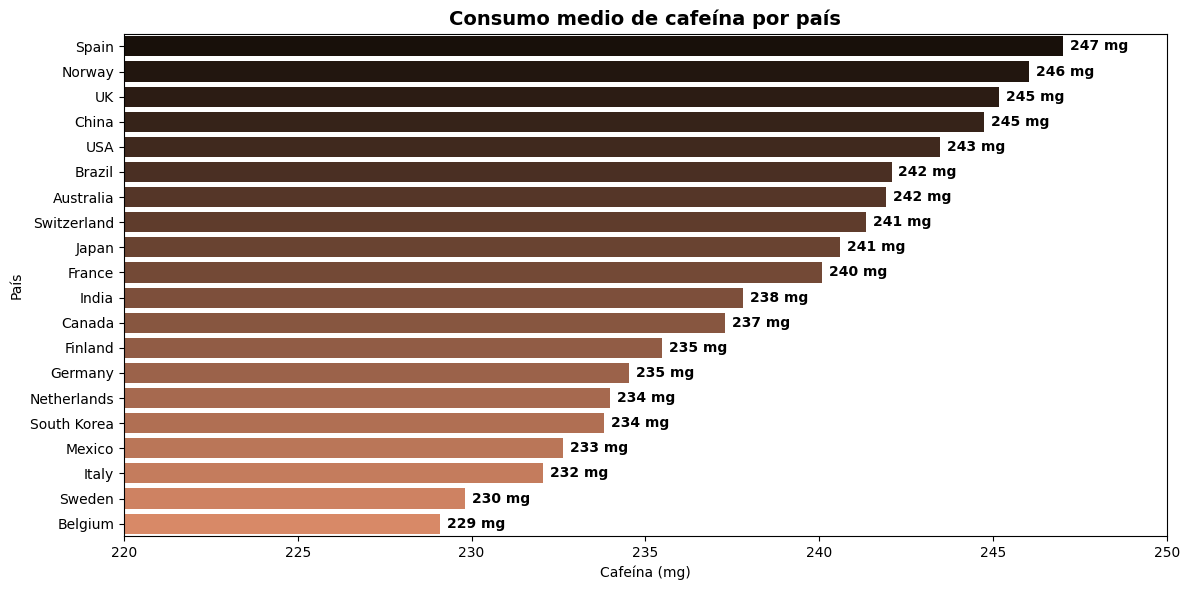

In [28]:
# Crear el gráfico de barras horizontales para los paises mostrando el consumo del café en mg

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_h1, y='Country', x='Caffeine_mg', palette=colores_cafe)

for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        ax.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                f'{width:.0f} mg', 
                ha='left', va='center', 
                fontweight='bold', fontsize=10)

plt.title('Consumo medio de cafeína por país',fontweight='bold', fontsize=14)
plt.xlabel('Cafeína (mg)')
plt.ylabel('País')
plt.xlim(220, 250)
plt.tight_layout()
plt.show()

### Conclusión Hipótesis 1

El país que más café consume segun mi estudio basado en la base de datos encontrada es España, seguido de Norway y UK.

##  HÍPOTESIS 2
### H2: Entre el consumo de cafeína y la calidad del sueño existe una correlación negativa.

In [29]:
# mostrar las clasificaciónes de la calidad del sueño
df['Sleep_Quality'].value_counts()

Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

In [30]:
# crear un dataframe con la media de las horas dormidas, y de los mg de cafeina consumidas por cada valor de Sleep_Quality, 
# para poder visualizar si de verdad cuanto más cafeina se toma, menos horas se durme y peor es el sueño
df_h2 = df.groupby('Sleep_Quality').mean('Sleep_Hours').round(2).sort_values('Sleep_Hours', ascending=False)[['Sleep_Hours', 'Coffee_Intake']]
df_h2

,Sleep_Hours,Coffee_Intake
Sleep_Quality,,
Excellent,8.59,2.05
Good,6.92,2.45
Fair,5.58,2.76
Poor,4.45,2.98


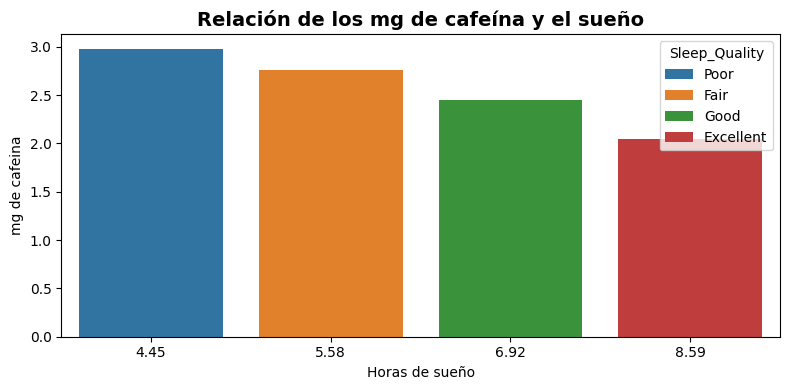

In [ ]:
# Gráfico para la representar la correlación negativa entre la calidad del sueño y los mg de cafeina consumidos

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_h2, y='Coffee_Intake', x='Sleep_Hours',hue=df_h2.index, hue_order=['Poor', 'Fair', 'Good', 'Excellent'])

plt.title('Relación de los mg de cafeína y el sueño',fontweight='bold', fontsize=14)
plt.xlabel('Horas de sueño')
plt.ylabel('mg de cafeina')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

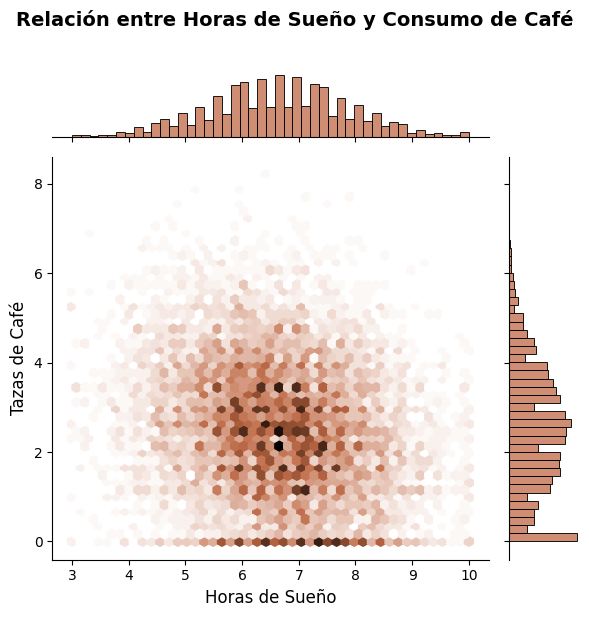

In [ ]:
# Gráfico con la diagrama de dispersión para entender como se relacionan las horas del sueño con la cantidad del café consumido y como se distribuen individualmente
plt.figure(figsize=(8, 5))
g = sns.jointplot(x=df['Sleep_Hours'],
              y=df['Coffee_Intake'],
              kind="hex",
              color=colores_cafe[15]);

# Añadir títulos a los ejes
g.set_axis_labels('Horas de Sueño', 'Tazas de Café', fontsize=12)

# Añadir título principal (usa suptitle en la figura)
g.fig.suptitle('Relación entre Horas de Sueño y Consumo de Café', 
               y=1.02, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusión Hipótesis 2

**Cierto**. Cuanto más café se consume, menos horas se duerme y es peor la calidad del sueño.

##  HÍPOTESIS 3
### H3: Hay diferencias significativas entre el consumo del café, nivel del estrés y calidad del sueño por genero.

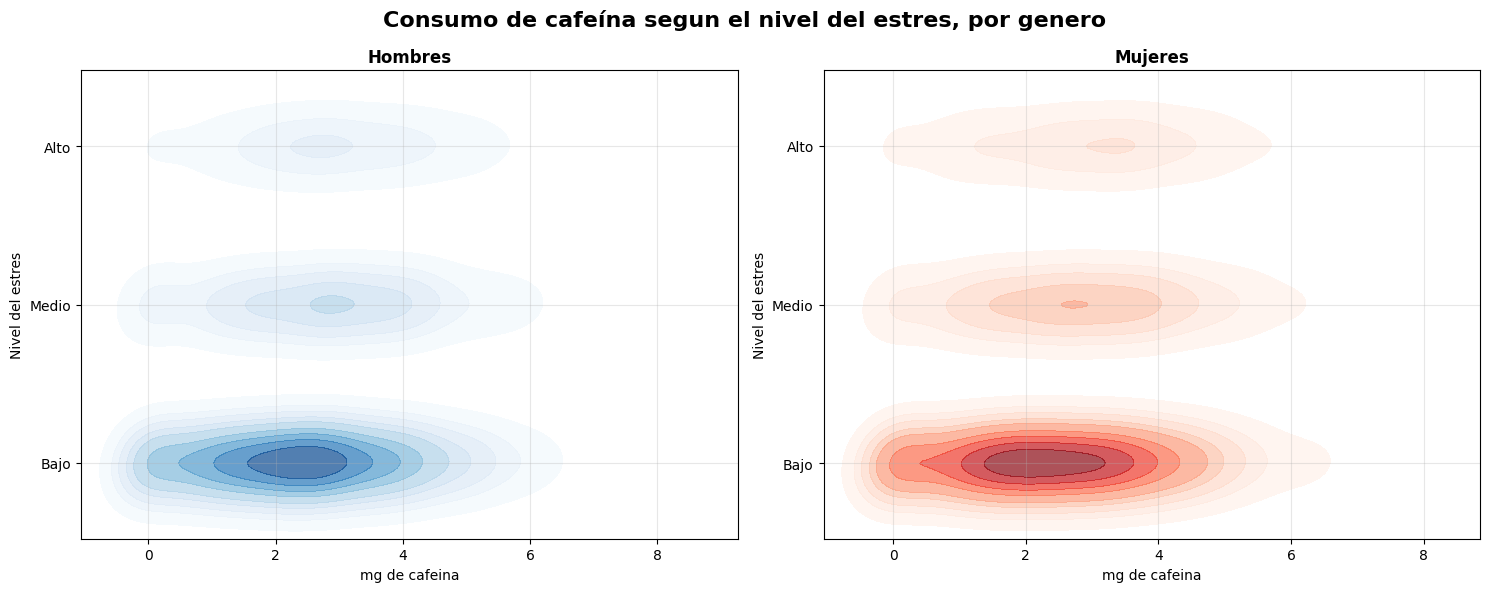

In [44]:
# Gráfico para mostrar la corelación entre el consumo de cafeína y el nivel del estres por genero
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(data=df[df['Gender'] == 'Male'], 
            x='Coffee_Intake', y='Stress_Level_num',
            fill=True, cmap='Blues', alpha=0.7,
            ax=ax1)
ax1.set_yticks([1, 2, 3])
ax1.set_yticklabels(['Bajo', 'Medio', 'Alto'])
ax1.set_title('Hombres', fontsize=12, fontweight='bold')
ax1.set_xlabel('mg de cafeina')
ax1.set_ylabel('Nivel del estres')
ax1.grid(True, alpha=0.3)

sns.kdeplot(data=df[df['Gender'] == 'Female'], 
            x='Coffee_Intake', y='Stress_Level_num',
            fill=True, cmap='Reds', alpha=0.7,
            ax=ax2)
ax2.set_yticks([1, 2, 3])
ax2.set_yticklabels(['Bajo', 'Medio', 'Alto'])
ax2.set_title('Mujeres', fontsize=12, fontweight='bold')
ax2.set_xlabel('mg de cafeina')
ax2.set_ylabel('Nivel del estres')
ax2.grid(True, alpha=0.3)

plt.suptitle('Consumo de cafeína segun el nivel del estres, por genero', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

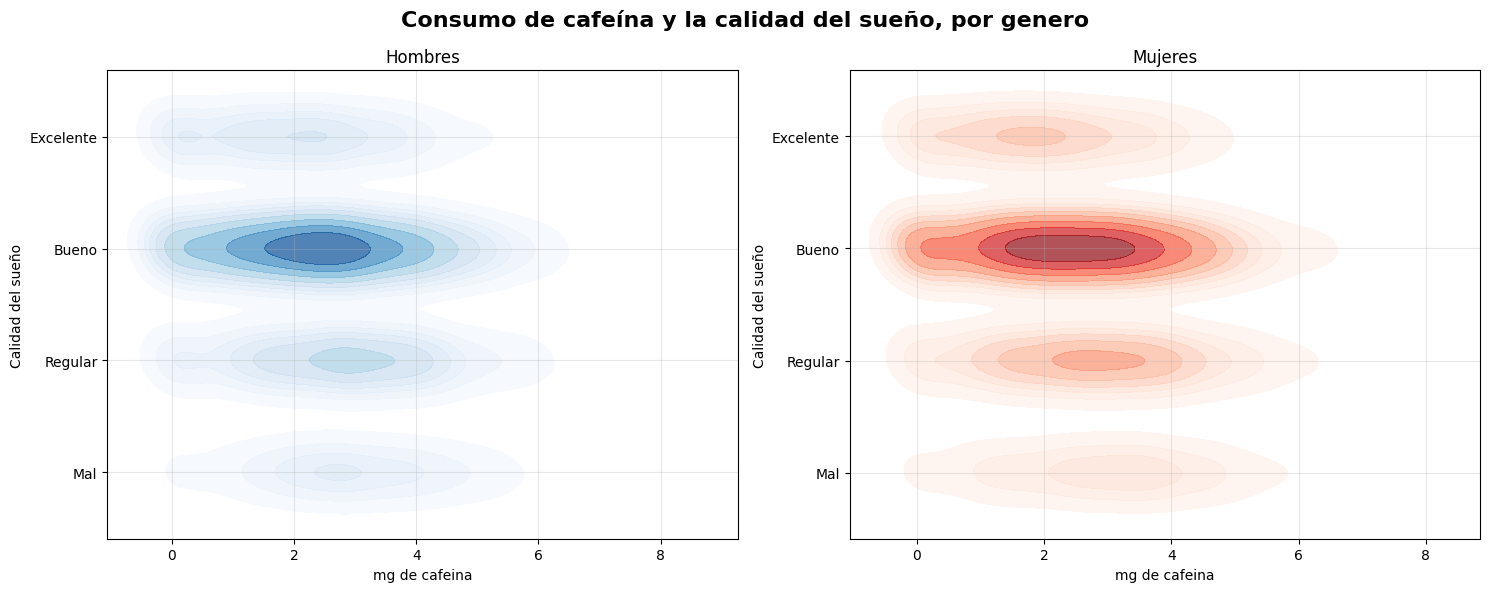

In [45]:
# Gráfico para mostrar la corelación entre el consumo de cafeína y la calidad del sueño por genero
fig, (ax11, ax22) = plt.subplots(1, 2, figsize=(15, 6))

sns.kdeplot(data=df[df['Gender'] == 'Male'], 
            x='Coffee_Intake', y='Sleep_Quality_num',
            fill=True, cmap='Blues', alpha=0.7,
            ax=ax11)
ax11.set_yticks([1, 2, 3, 4])
ax11.set_yticklabels(['Mal', 'Regular', 'Bueno', 'Excelente'])
ax11.set_title('Hombres')
ax11.set_xlabel('mg de cafeina')
ax11.set_ylabel('Calidad del sueño')
ax11.grid(True, alpha=0.3)

# KDE plot para género 2 (ej: Femenino)
sns.kdeplot(data=df[df['Gender'] == 'Female'], 
            x='Coffee_Intake', y='Sleep_Quality_num',
            fill=True, cmap='Reds', alpha=0.7,
            ax=ax22)
ax22.set_yticks([1, 2, 3, 4])
ax22.set_yticklabels(['Mal', 'Regular', 'Bueno', 'Excelente'])
ax22.set_title('Mujeres')
ax22.set_xlabel('mg de cafeina')
ax22.set_ylabel('Calidad del sueño')
ax22.grid(True, alpha=0.3)

plt.suptitle('Consumo de cafeína y la calidad del sueño, por genero', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

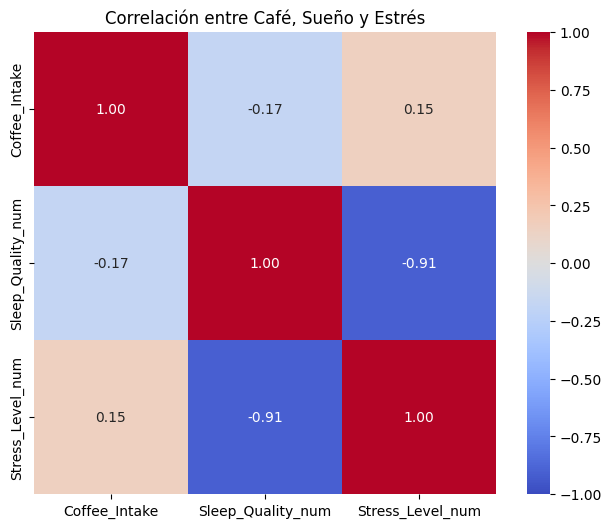

In [46]:
# Gráfico que calcula la  correlaciones entre los mg de café consumidos, la calidad del sueño y el nivel del estres
corr_matrix = df[['Coffee_Intake', 'Sleep_Quality_num', 'Stress_Level_num']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', vmin=-1)
plt.title('Correlación entre Café, Sueño y Estrés')
plt.show()

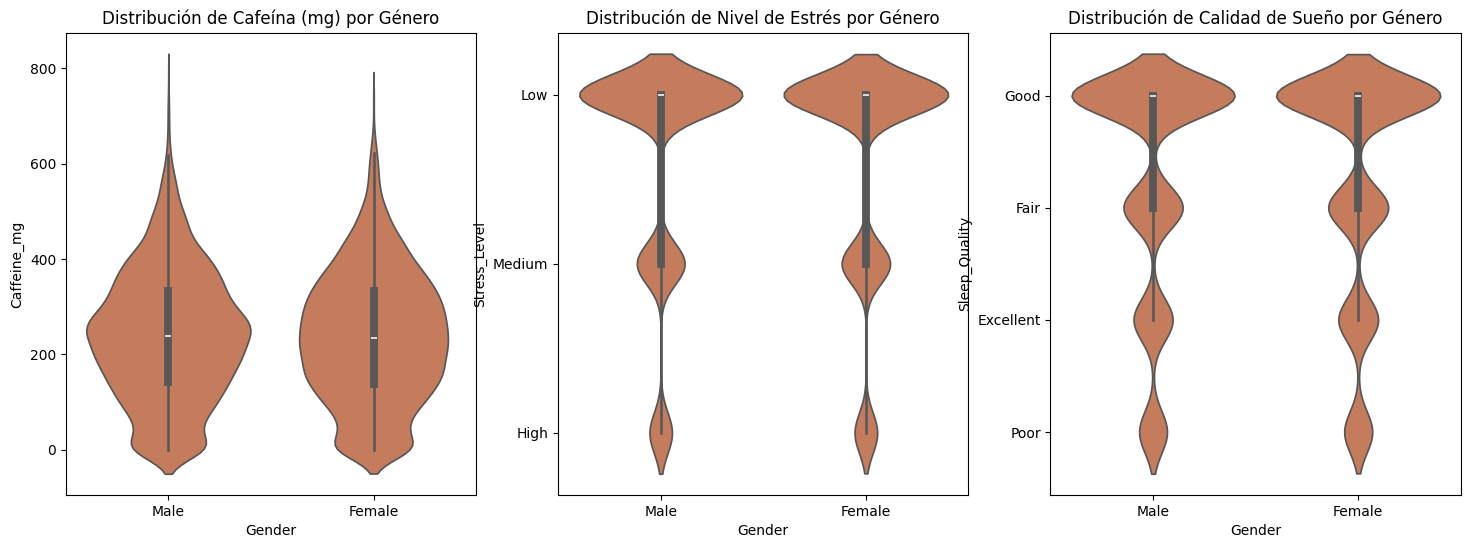

In [47]:
# Gráficos  de tipo violin que muestra las diferencias del consumo de cafeina, nivel de estres y calidad de sueño por genero 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
data1 = df[df['Gender'].isin(['Male','Female'])]

variables = ['Caffeine_mg', 'Stress_Level', 'Sleep_Quality']
titles = ['Cafeína (mg)', 'Nivel de Estrés', 'Calidad de Sueño']

for i, (var, title) in enumerate(zip(variables, titles)):
    sns.violinplot(x='Gender', y=var, data=data1, ax=axes[i], color=colores_cafe[17])
    axes[i].set_title(f'Distribución de {title} por Género')
plt.show()

### Conclusión Hipótesis 3

De mi estudio se puede observar que lás mujeres tienden a tomar menos café que los hombres, pero en general **NO** hay diferencias significativas entre el consumo del café, nivel del estrés y calidad del sueño por genero.

##  HÍPOTESIS 4
### H4: Los adultos (18-55) toman más café y duermen menos horas que los mayores(56-80).

In [48]:
# Cuantas horas de promedio durmen lod adultos y los mayores
print(df[df['Age_Group']=='Joven']['Sleep_Hours'].mean().round(2))
print(df[df['Age_Group']=='Adulto']['Sleep_Hours'].mean().round(2))
print(df[df['Age_Group']=='Mayor']['Sleep_Hours'].mean().round(2))

6.63
6.65
6.58


In [49]:
# Y cuantos mg de cafeina de promedio toman los adultos y los mayores
print(df[df['Age_Group']=='Joven']['Coffee_Intake'].mean().round(2))
print(df[df['Age_Group']=='Adulto']['Coffee_Intake'].mean().round(2))
print(df[df['Age_Group']=='Mayor']['Coffee_Intake'].mean().round(2))

2.51
2.51
2.43


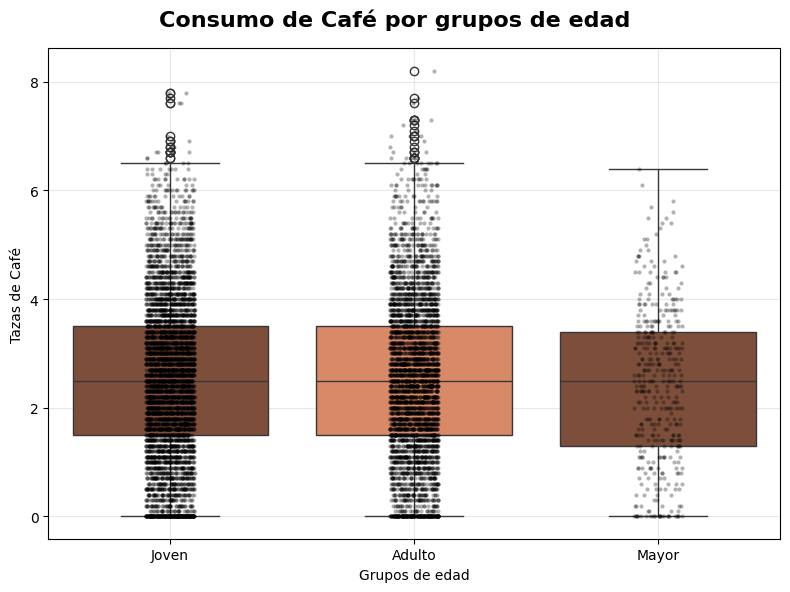

In [50]:
#Grafico que muestra la distribución de las tazas de cafépor grupos de edad
fig, ax1= plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='Age_Group', y='Coffee_Intake', ax=ax1, palette=[colores_cafe[10],colores_cafe[19]], order=['Joven','Adulto','Mayor'])
sns.stripplot(data=df, x='Age_Group', y='Coffee_Intake', ax=ax1, color='black', alpha=0.3, size=3, order=['Joven','Adulto','Mayor'])
ax1.set_ylabel('Tazas de Café')
ax1.set_xlabel('Grupos de edad')
ax1.grid(True, alpha=0.3)
plt.suptitle('Consumo de Café por grupos de edad', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

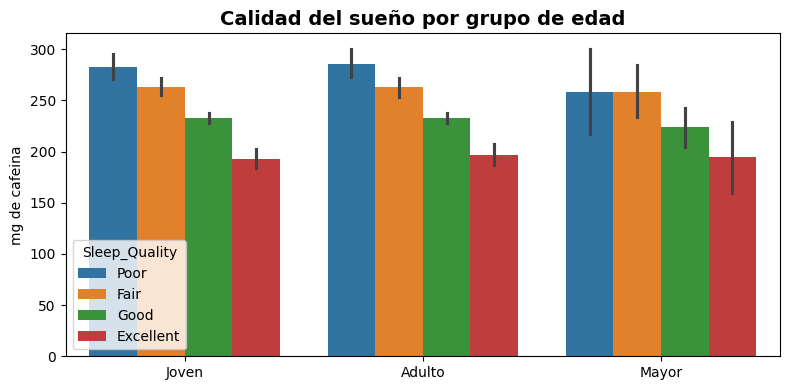

In [51]:
# Gráfico de barras horizontales que muestra la calidad del sueño y los mg de café consumidos por grupo de edad
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df, y='Caffeine_mg', x='Age_Group',hue='Sleep_Quality', hue_order=['Poor', 'Fair', 'Good', 'Excellent'], order=['Joven','Adulto','Mayor'])

plt.title('Calidad del sueño por grupo de edad',fontweight='bold', fontsize=14)
plt.xlabel('')
plt.ylabel('mg de cafeina')
plt.tight_layout()
plt.show()

### Conclusión Hipótesis 4

De lo que se puede ver, los jovenes **Si** que toman más cafe, y los motivos creo que son obvios: por falta de tiempo y para hacer frente a la vida cotidiana a veces un café es el "empujon" que la mayoría de la gente necesita.
Curiosamente, segun el estudio, las personaj jovenes/adultos duarmen más horas de promedio que las persoans mayores.

##  HÍPOTESIS 5
### H5: Las horas fisicamente activas se correlacionan positivamente con la calidad del sueño, pero negativamente con el IMC y el nivel del estres.

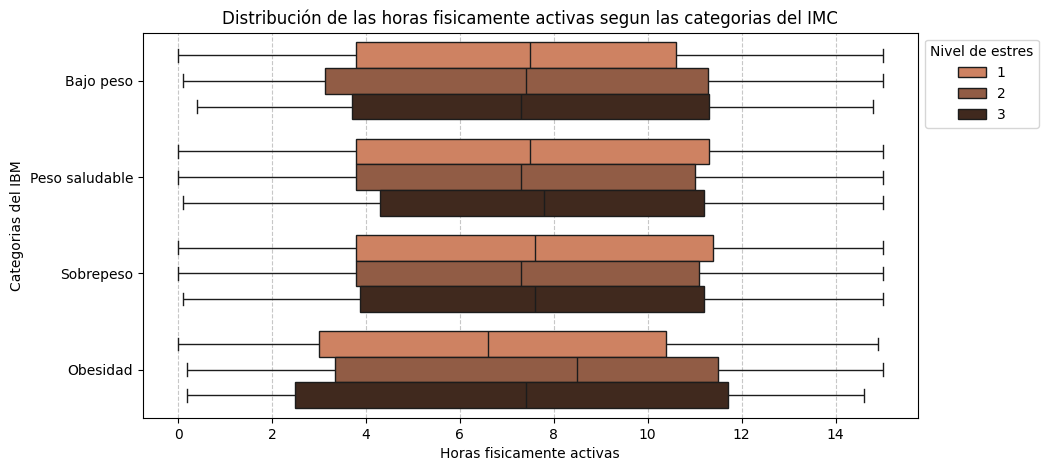

In [ ]:
# Gráfico de distribución de las horas fisicamente activas segun las categorías del IMC teneindo en cuenta el nivel del estres
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='Physical_Activity_Hours',
    y='Categoria_BMI',
    hue='Stress_Level_num',
    order=['Bajo peso', 'Peso saludable', 'Sobrepeso', 'Obesidad'],
    palette=[colores_cafe[18], colores_cafe[12],colores_cafe[4]],
    )
plt.title('Distribución de las horas fisicamente activas segun las categorias del IMC')
plt.xlabel('Horas fisicamente activas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.ylabel('Categorias del IBM')
plt.legend(title= 'Nivel de estres', loc=2, bbox_to_anchor=(1, 1))
plt.show()

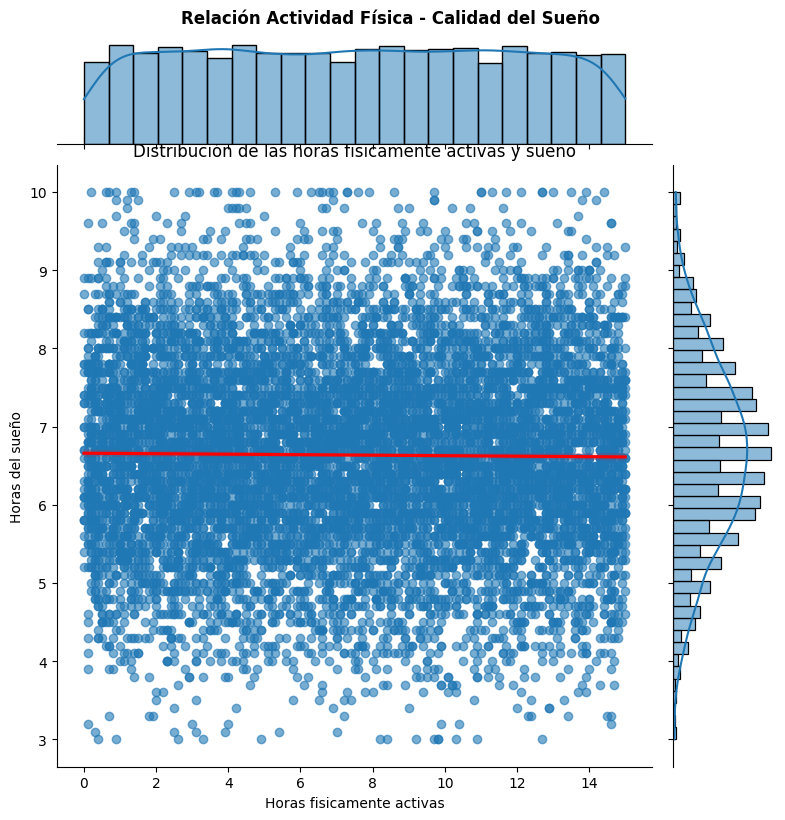

In [53]:
# Gráfico de distribuición de las horas activas y la duración del sueño
g = sns.jointplot(data=df, x='Physical_Activity_Hours', y='Sleep_Hours', 
                  kind='reg', height=8,
                  joint_kws={'scatter_kws': {'alpha':0.6}, 
                            'line_kws': {'color':'red'}})
g.fig.suptitle('Relación Actividad Física - Calidad del Sueño',fontweight='bold', fontsize=12, y=1.02)
plt.title('Distribución de las horas fisicamente activas y sueño')
plt.ylabel('Horas del sueño')
plt.xlabel('Horas fisicamente activas')
plt.show()

### Conclusión Hipótesis 5

No se ha podido registrar una correlación clara de las horas fisicamente activas con la calidad del sueño, pero si puedo decir en cuanto menos horas fisicas registra la gente, más obesas están y mayor es el nivel del estrés.

##  HÍPOTESIS 6
### H6: Los estudiantes y el personal medico son los que menos duermen y mas café consumen.

In [55]:
# Creo un dataframe con las distintas ocupaciónes y el promedio de las horas que duermen
df_h6=df.groupby('Occupation', as_index=False).mean('Sleep_Hours')[['Occupation','Sleep_Hours']].sort_values(by='Sleep_Hours', ascending=False)
df_h6

,Occupation,Sleep_Hours
0,Healthcare,6.671894
4,Student,6.641921
3,Service,6.634798
2,Other,6.622866
1,Office,6.611481


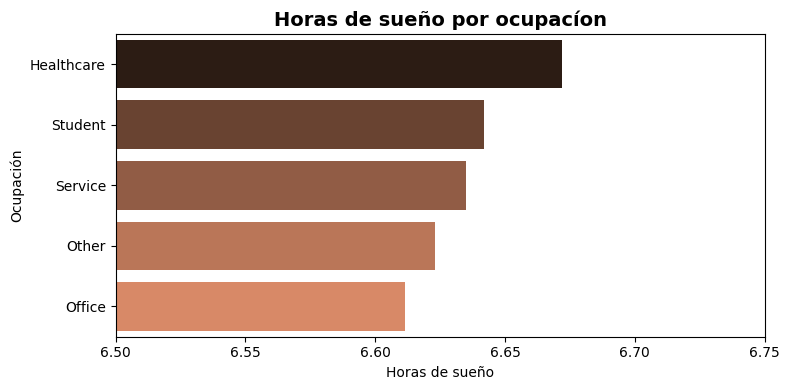

In [57]:
# Gráfico de barras horizontales para mostrar el promedio de las horas dormidas por ocupación
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_h6, y='Occupation', x='Sleep_Hours', palette=[colores_cafe[2], colores_cafe[8], colores_cafe[12], colores_cafe[16], colores_cafe[19]])

plt.title('Horas de sueño por ocupacíon',fontweight='bold', fontsize=14)
plt.xlabel('Horas de sueño')
plt.ylabel('Ocupación')
plt.xlim(6.5, 6.75)
plt.tight_layout()
plt.show()

In [58]:
# Creo otro dataframe con las distintos ocupaciónes y el promedio de los mg de cafeína consumidos
df_h6b=df.groupby('Occupation', as_index=False).mean('Caffeine_mg').round(2)[['Occupation','Caffeine_mg']].sort_values(by='Caffeine_mg', ascending=False)
df_h6b

,Occupation,Caffeine_mg
0,Healthcare,241.39
4,Student,238.70
3,Service,238.61
2,Other,237.66
1,Office,235.86


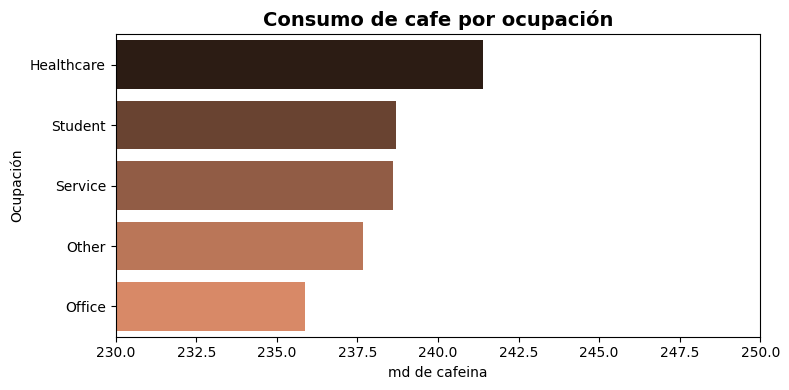

In [59]:
# Gráfico de barras horizontales para mostrar el promedio de los mg de cafeína consumidos por ocupación
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_h6b, y='Occupation', x='Caffeine_mg', palette=[colores_cafe[2], colores_cafe[8], colores_cafe[12], colores_cafe[16], colores_cafe[19]])

plt.title('Consumo de cafe por ocupación',fontweight='bold', fontsize=14)
plt.xlabel('md de cafeina')
plt.ylabel('Ocupación')
plt.xlim(230, 250)
plt.tight_layout()
plt.show()

### Conclusión Hipótesis 6

**Cierto**. Los estudiantes y el personal médico duermen más horas que otras personas y toman más café a diario.

##  HÍPOTESIS 7
### H7: Las personan que fuman y toman alcool consumen más café.

In [60]:
# Crear grupos combinados de los que fuman o no y los que toman alcohol o no
df['Grupo'] = df['Alcohol_Consumption'].astype(str) + '_' + df['Smoking'].astype(str)
mapeo_grupos = {
    '0_0': 'No alcohol\nNo fuma',
    '0_1': 'No alcohol\nFuma', 
    '1_0': 'Alcohol\nNo fuma',
    '1_1': 'Alcohol\nFuma'
}
df['Grupo_etiqueta'] = df['Grupo'].map(mapeo_grupos)

In [61]:
# Calcular promedio de café
promedio_cafe = df.groupby('Grupo_etiqueta')['Caffeine_mg'].mean().round(2).sort_values(ascending=False)
promedio_cafe

Grupo_etiqueta
No alcohol\nFuma       242.25
Alcohol\nFuma          239.28
No alcohol\nNo fuma    238.34
Alcohol\nNo fuma       236.12
Name: Caffeine_mg, dtype: float64

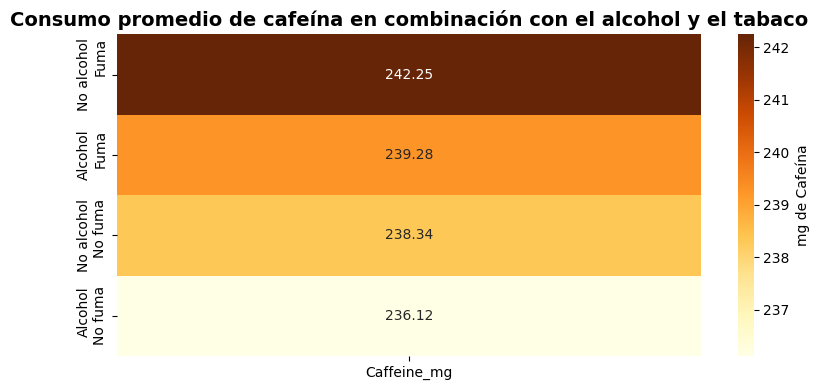

In [62]:
plt.figure(figsize=(8, 4))
sns.heatmap(promedio_cafe.to_frame(), annot=True, cmap='YlOrBr', fmt='.2f', 
            cbar_kws={'label': 'mg de Cafeína'})
plt.ylabel('')
plt.title('Consumo promedio de cafeína en combinación con el alcohol y el tabaco', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Conclusión Hipótesis 5
Las personan que fuman y toman alcool consumen más café.

**Cierto solo por la mitad**. Como se puede ver en el gráfico de arriba, las personas que toman más cafe son lás personas que fuman, pero no toman alcohol (o no toman mucho :) .